In [ ]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
Data = pd.read_csv('Company_Data.csv')
Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
Data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in Data.select_dtypes(include='object'):
    Data[column] = le.fit_transform(Data[column])

Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [ ]:
Data['Sales'] = Data['Sales'].astype('int64')

In [ ]:
Data.info

<bound method DataFrame.info of      Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        9        138      73           11         276    120          0   42   
1       11        111      48           16         260     83          1   65   
2       10        113      35           10         269     80          2   59   
3        7        117     100            4         466     97          2   55   
4        4        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395     12        138     108           17         203    128          1   33   
396      6        139      23            3          37    120          2   55   
397      7        162      26           12         368    159          2   40   
398      5        100      79            7         284     95          0   50   
399      9        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]>

<ipython-input-13-68c875c6c815>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data["Sales"], kde=False, bins=10)


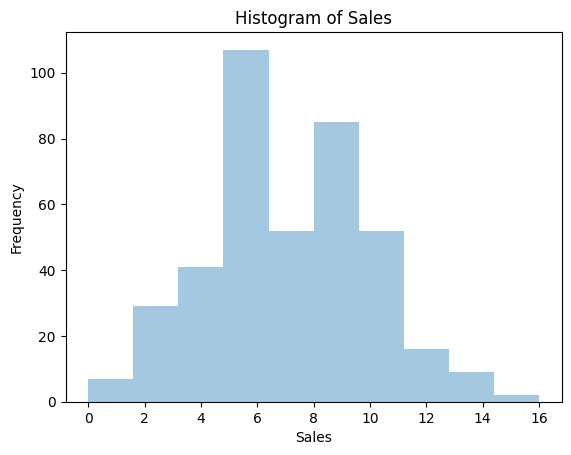

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the "Sales" column
sns.distplot(Data["Sales"], kde=False, bins=10)

# Add labels and title
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Histogram of Sales")

# Show the plot
plt.show()

In [ ]:
x =Data.iloc[:, 1:]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [ ]:
y = Data.iloc[:,0]
y

0       9
1      11
2      10
3       7
4       4
       ..
395    12
396     6
397     7
398     5
399     9
Name: Sales, Length: 400, dtype: int64

In [ ]:
print(x.head())
print(y.head())

   CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0  
0     9
1    11
2    10
3     7
4     4
Name: Sales, dtype: int64


In [ ]:
seed = 5
kfold = KFold(n_splits=5,random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 50

In [ ]:
model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=seed)
model

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=5)

In [ ]:
results = cross_val_score(model, x,y, cv=kfold)
results

array([0.15  , 0.175 , 0.2375, 0.1375, 0.2625])

In [ ]:
print(results.mean())

0.19249999999999998


In [ ]:
## bagging / random forest
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [ ]:
y

0       9
1      11
2      10
3       7
4       4
       ..
395    12
396     6
397     7
398     5
399     9
Name: Sales, Length: 400, dtype: int64

In [ ]:
num_tress = 100
max_features = 3
kfold = KFold(n_splits=10)

In [ ]:
model = RandomForestClassifier(n_estimators=num_tress, max_features=max_features)

In [ ]:
results = cross_val_score(model, x,y, cv=kfold)
results

array([0.175, 0.125, 0.225, 0.2  , 0.225, 0.225, 0.275, 0.15 , 0.175,
       0.15 ])

In [ ]:
print(results.mean())

0.1925


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (280, 10)
X_test shape: (120, 10)
y_train shape: (280,)
y_test shape: (120,)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
model.fit(X_train,y_train)

predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train)

accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


Target on train data [ 5  8  5  7  6  3  7  4  4  4  3 12  7  8  8  5  5  6  5  3  3 11 14  9
  2  7  4  7 11 12  9  4  6  9 13  0  4  5  5  7  9 15  9  8  8  8  3  8
  9  9  8  6  4  7  8  5  6 11  6  9 10  5  6  5  7  8  3  2  9  8  7  3
  7  3  7  6  6  7  5  7 11  8  7  8  6  0  7  5  7  9  2  6  2  8  5  5
  3  5  4  6 11  5  9  5  9 14  5  5  2  8 10  7 11  7  9  6  4  3  4  5
  6  7  4  5  4  4 12  7  7  7  4  8  6 10 10 11  7  2  5 13  8  5  4 12
  9  8  6  0  6  7  4  5  7  6 11  5  5  9  0  7 11  6  8  9  4  4  3  9
  7 11 11  8  7 11  7  5 16  3 10 10  6  4  5 10  6 11  8  6  6  5  7  8
  9  4  8  4  0 11  9  6  7  7  4 13 11  7  9  6  8 13  5  6  6 10 10  6
  5  8 11  8  7  7  4  8  4  4  5 10  5  8  5  8  6 10  7 10  5 12  2  3
  6 12  7  8  8  9  4  7 10  9  5  4  7  5  6  9  3  9  8 13  4  2  5  4
  5  8  6  8 11  7 12  6  8  5  6 12  7 12  4  7]

accuracy_score on train dataset :  1.0


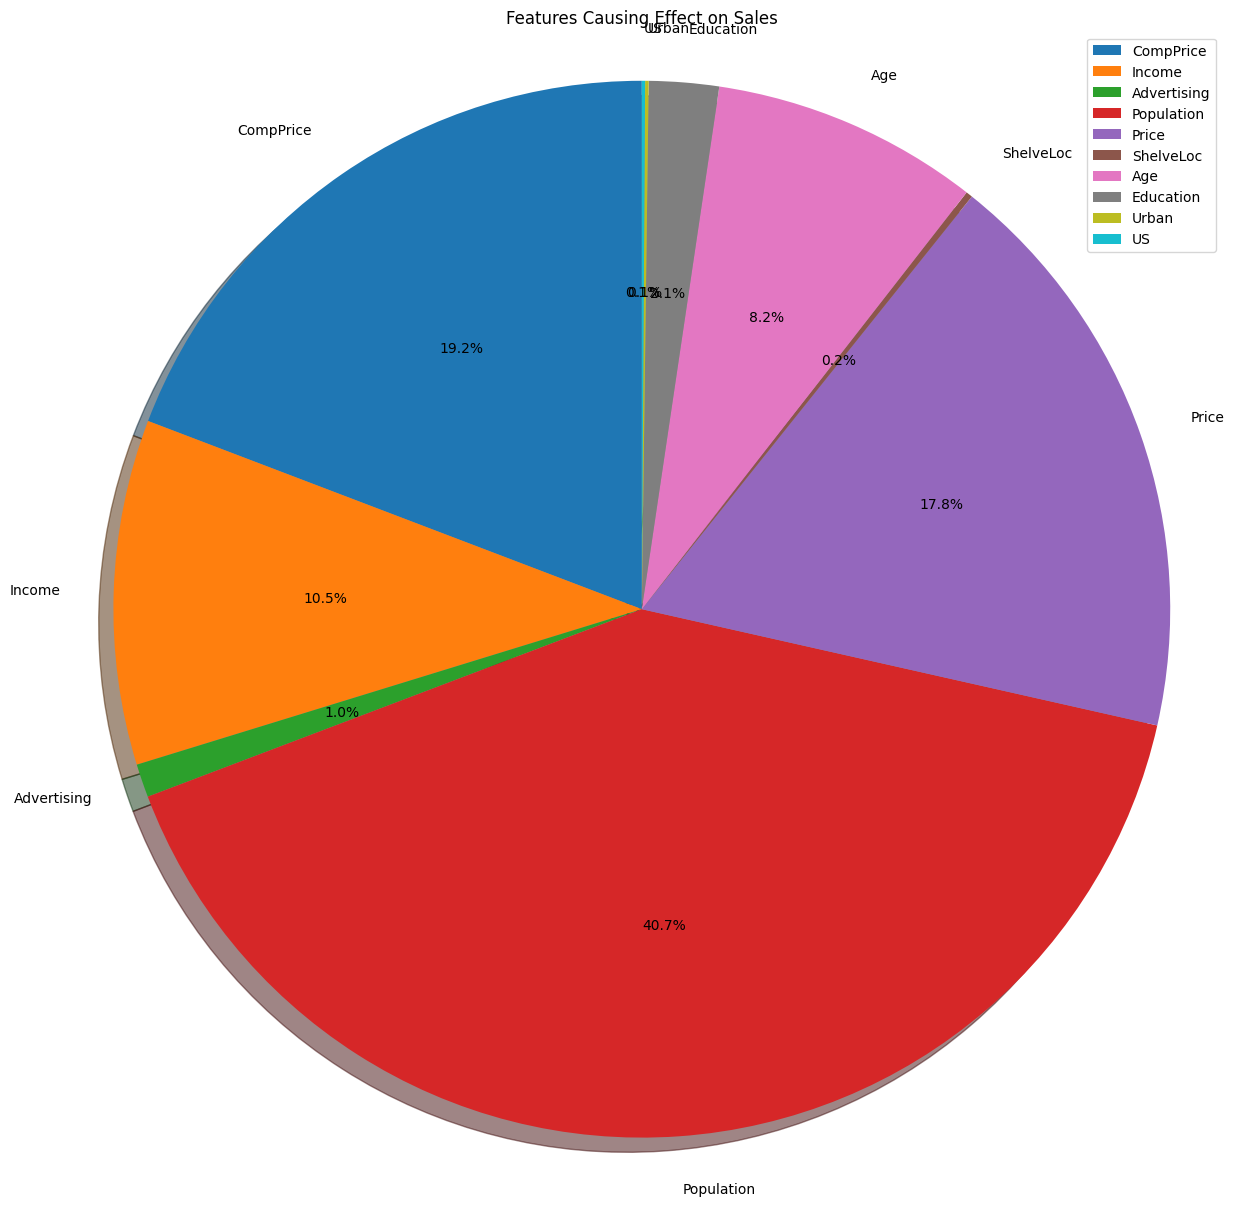

In [ ]:
labels = Data.columns[1:]
sizes = Data.mean(axis=0)[1:]
fig1, ax1 = plt.subplots(figsize=(15, 15))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Features Causing Effect on Sales')
plt.legend()
plt.show()

In [ ]:
## Adaboost
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
num_tress = 10
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

In [ ]:
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model


AdaBoostClassifier(random_state=7)

In [ ]:
results = cross_val_score(model, x,y, cv=kfold)
results

array([0.15 , 0.175, 0.1  , 0.2  , 0.075, 0.05 , 0.075, 0.075, 0.075,
       0.15 ])

In [ ]:
print(results.mean())

0.1125


In [ ]:
## stacking ensemble for classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [ ]:
kfold = KFold(n_splits=10)

In [ ]:
estimators = [ ]

model1 = LogisticRegression(max_iter=500)
estimators.append(('Logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svc', model3))

## create ensemble method
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
estimators

[('Logistic', LogisticRegression(max_iter=500)),
 ('cart', DecisionTreeClassifier()),
 ('svc', SVC())]

In [ ]:
results

array([0.075, 0.1  , 0.125, 0.2  , 0.175, 0.175, 0.25 , 0.1  , 0.1  ,
       0.2  ])

In [ ]:
print(results.mean())

0.15


In [ ]:
print(results.mean())